# Feature Selection

Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.

Feature selection is often straightforward when working with real-valued input and output data, such as using the Pearson’s correlation coefficient, but can be challenging when working with numerical input data and a categorical target variable.

The two most commonly used feature selection methods for numerical input data when the target variable is categorical (e.g. classification predictive modeling) are:

- ANOVA-f Statistic.
- Mutual Information Statistics.

### ANOVA f-test

ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

"When the outcome is numeric, and […] the predictor has more than two levels, the traditional ANOVA F-statistic can be calculated." — Page 242, Feature Engineering and Selection, 2019.

**The scikit-learn machine library provides an implementation of the ANOVA f-test in the *f_classif()* function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.**

In [19]:
import pandas as pd

# load the dataset as a pandas DataFrame
df = pd.read_csv('../data/df.csv')
dataset = df.values

# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
    
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [3]:
dic = {}


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: radar_track_range 26.807508
Feature 2: distance 6809.252132
Feature 3: missile_act_dist 44.557284
Feature 4: delta_altitude 1290.269933
Feature 5: delta_speed 964.726751
Feature 6: missile_range 520.275817
Feature 7: rcs 2.721266
Feature 8: firerange 452.104185
Feature 9: concept 599.922798
Feature 10: angle_uni_to_tgt 15.357259
Feature 11: delta_heading 102.434102


In [4]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
1,distance,6809.252132
3,delta_altitude,1290.269933
4,delta_speed,964.726751
8,concept,599.922798
5,missile_range,520.275817
7,firerange,452.104185
10,delta_heading,102.434102
2,missile_act_dist,44.557284
0,radar_track_range,26.807508
9,angle_uni_to_tgt,15.357259


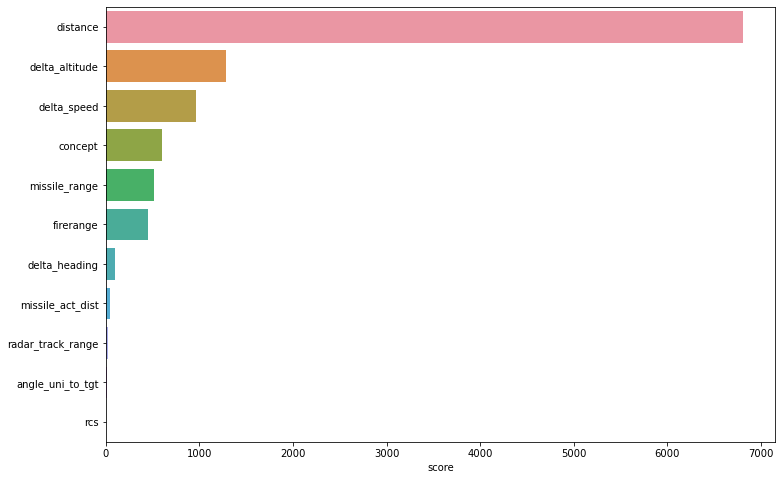

In [5]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x=scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

A bar chart of the feature importance scores for each input feature is created.

This clearly shows that feature 1 might be the most relevant (according to test) and that perhaps six more input features are the more relevant.

We could set k=7 when configuring the SelectKBest to select these top seven features.

### Mutual Information

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, it can be adapted for use with numerical input and categorical output.

For technical details on how this can be achieved, see the 2014 paper titled “Mutual Information between Discrete and Continuous Data Sets.” (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

**The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and categorical output variables via the *mutual_info_classif()* function. Like *f_classif()*, it can be used in the *SelectKBest* feature selection strategy (and other strategies).**

In [6]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
     
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [7]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: radar_track_range 0.010990
Feature 2: distance 0.045011
Feature 3: missile_act_dist 0.012817
Feature 4: delta_altitude 0.020698
Feature 5: delta_speed 0.022781
Feature 6: missile_range 0.012223
Feature 7: rcs 0.012933
Feature 8: firerange 0.012690
Feature 9: concept 0.005568
Feature 10: angle_uni_to_tgt 0.012998
Feature 11: delta_heading 0.025301


In [8]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
1,distance,0.045011
10,delta_heading,0.025301
4,delta_speed,0.022781
3,delta_altitude,0.020698
9,angle_uni_to_tgt,0.012998
6,rcs,0.012933
2,missile_act_dist,0.012817
7,firerange,0.012690
5,missile_range,0.012223
0,radar_track_range,0.010990


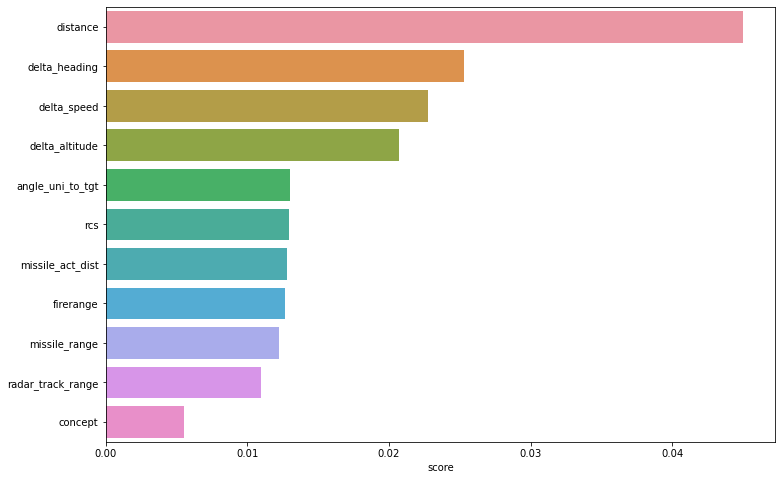

In [9]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x= scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

## Recursive Feature Elimination

Next, we can evaluate an RFE feature selection algorithm on this dataset. We will use a DecisionTreeClassifier to choose features and set the number of features to five. We will then fit a new DecisionTreeClassifier model on the selected features.

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In this case, we can see the RFE that uses a decision tree and selects five features and then fits a decision tree on the selected features achieves a classification accuracy of about 83.5 percent.

In [10]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.835 (0.003)


We can also use the RFE model pipeline as a final model and make predictions for classification.

First, the RFE and model are fit on all available data, then the predict() function can be called to make predictions on new data.

In [11]:
# make a prediction with an RFE pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit the model on all available data
pipeline.fit(X, y)

# make a prediction for one example
data = X[[0]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0


In [12]:
print('Real Class:',int(y[0]))

Real Class: 0


## RFE Hyperparameters

We will take a closer look at some of the hyperparameters you should consider tuning for the RFE method for feature selection and their effect on model performance.

### Explore Number of Features

An important hyperparameter for the RFE algorithm is the number of features to select.

In the previous section, we used an arbitrary number of selected features, five, which matches the number of informative features in the synthetic dataset. In practice, we cannot know the best number of features to select with RFE; instead, it is good practice to test different values.

The example below demonstrates selecting different numbers of features from 2 to 10 on the synthetic binary classification dataset.

In [13]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 0.828 (0.003)
>3 0.831 (0.003)
>4 0.833 (0.003)
>5 0.835 (0.003)
>6 0.835 (0.002)
>7 0.836 (0.003)
>8 0.836 (0.002)
>9 0.836 (0.002)


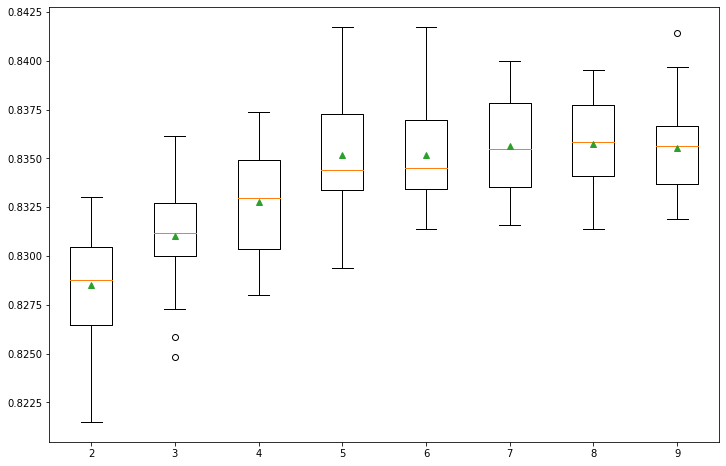

In [14]:
# plot model performance for comparison
plt.figure(figsize=(12,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Automatically Select the Number of Features

It is also possible to automatically select the number of features chosen by RFE.

This can be achieved by performing cross-validation evaluation of different numbers of features as we did in the previous section and automatically selecting the number of features that resulted in the best mean score.

The RFECV class implements this for us.

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the “min_features_to_select” argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) and “scoring” arguments (uses accuracy for classification).

In [15]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.835 (0.003)


In this case, we can see the RFE that uses a decision tree and automatically selects a number of features and then fits a decision tree on the selected features achieves a classification accuracy of about 88.6 percent.

## Which Features Were Selected

When using RFE, we may be interested to know which features were selected and which were removed.

This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

The example below fits an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

In [16]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 6.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 5.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


## Explore Base Algorithm

There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance.

Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE.

The example below demonstrates how you might explore this configuration option.

In [17]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.894 (0.031)
>per 0.846 (0.041)
>cart 0.888 (0.030)
>rf 0.862 (0.043)
>gbm 0.888 (0.027)


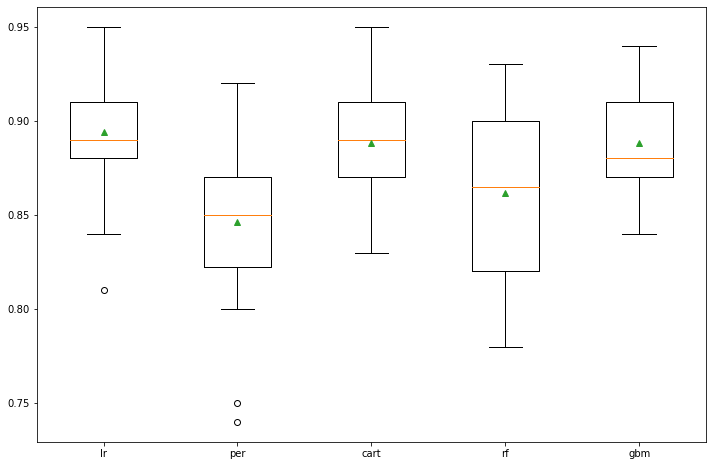

In [18]:
# plot model performance for comparison
plt.figure(figsize=(12,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Source

- https://machinelearningmastery.com/rfe-feature-selection-in-python/